<div><center><img src="https://ml.ucv.ai/logo.png" width="150"/> </center></div>

# 07 Árboles de Decisión
## Versión v.1

El notebook lo puedo modificar, esta versión es la b.1 a 10/07/2024 a las Caracas.

## Aprendizaje Automático [UCV]


* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be
----


# 1. Intuición

## 1.1 Funciones para graficar

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def plot_data_multiclass(X, y, idx=(0, 1), xi=None, yi=None):
  plt.figure(figsize=(10,10))
  plt.scatter(X[:, idx[0]], X[:, idx[1]], c=y, s=30, cmap=plt.cm.Paired)

  if xi is None or yi is None:
    plt.show()
    return 1

  plt.scatter(xi, yi, c=[3] if len(xi) == 1 else [3, 4], s=30)

  plt.scatter(
      xi,
      yi,
      s=100,
      linewidth=1,
      facecolors="none",
      edgecolors="k",
  )
  if len(xi) == 2:
    plt.plot(xi, yi, 'k-')
  plt.show()


## 1.2 Separando con hiperplanos simples

Supongamos que solo vamos a separar de la forma $(j, t_i)$ con:

1. $j$ el índice de alguna característica.
1. $t_i$ un valor de la característica creando el intervalo $x_j \leq t_i$

In [ ]:
X, y = load_iris(return_X_y=True)


In [ ]:
type(X)

numpy.ndarray

In [ ]:
X

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Algunas veces, este criterio resulta poco útil

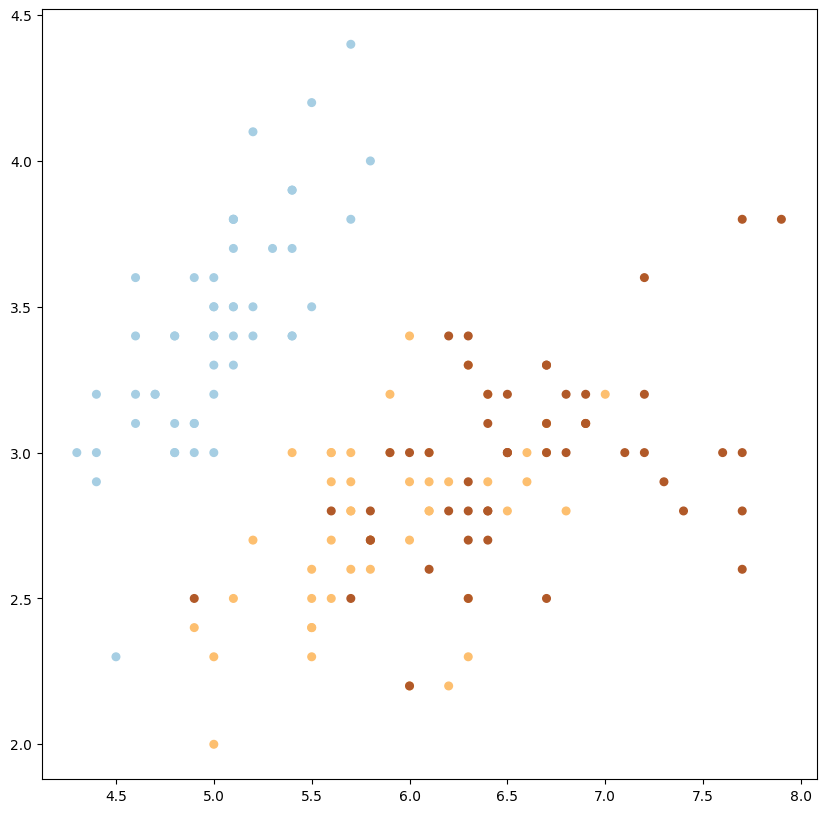

1

In [ ]:
plot_data_multiclass(X, y)

sin embargo, en algunos casos resulta útil

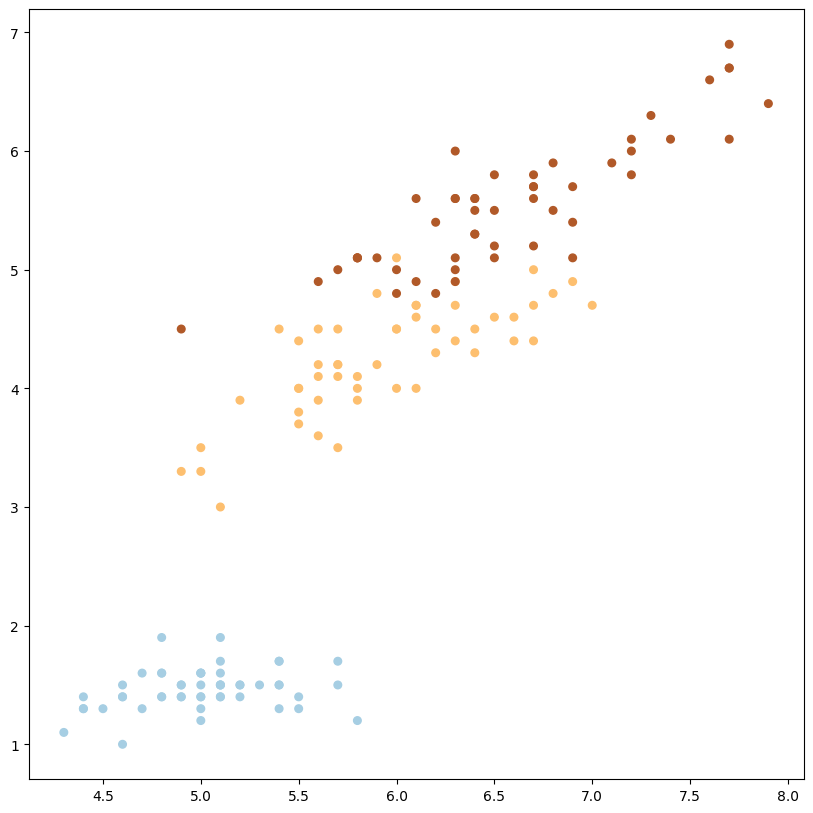

1

In [ ]:
plot_data_multiclass(X, y, (0, 2))

podemos modificar las dimensiones y podría funcionar también

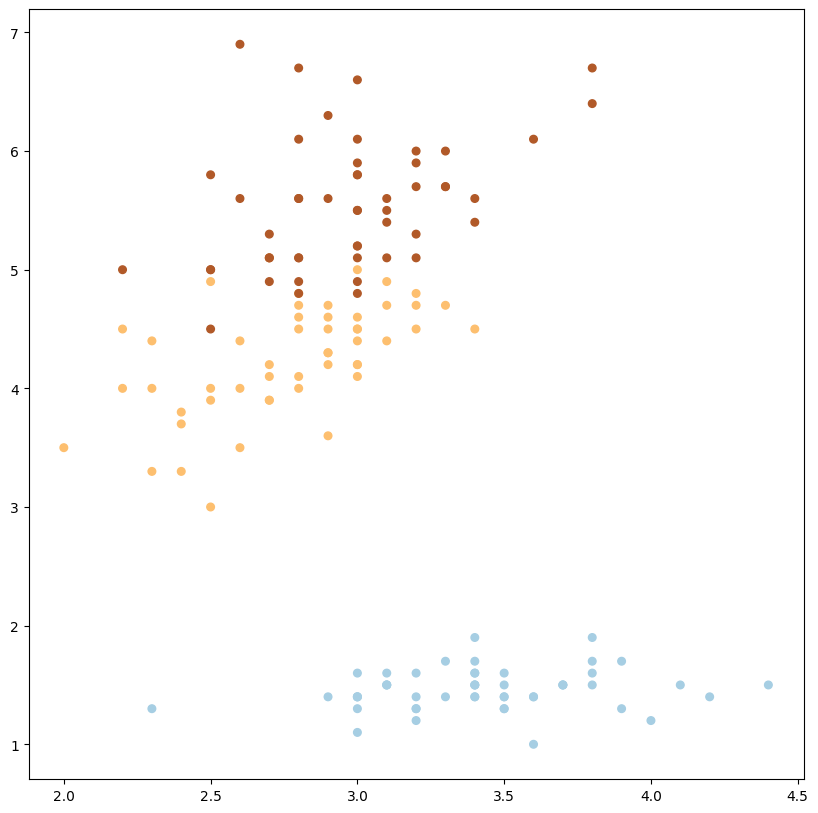

1

In [ ]:
plot_data_multiclass(X, y, (1, 2))

## 1.3 3D graph

Veamos cómo se podría entender en tres dimensiones

### 1.3.1 Usando plotly


In [ ]:
import plotly.express as px
df = px.data.iris()

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [ ]:
fig = px.scatter(
    df, x='sepal_length', y='sepal_width',
    color='species',
    size = 'petal_length'
)

fig.show()

In [ ]:
import plotly.express as px
df = px.data.iris()

fig = px.scatter_3d(
    df, x='sepal_length', y='sepal_width', z='petal_width',
    color='species',
    size = 'petal_length',

)

fig.show()

### 1.3.2 Usando scipy y plotly

In [ ]:
import scipy.io
import plotly.graph_objs as go
import numpy as np

In [ ]:
iris = load_iris()

In [ ]:
df = pd.DataFrame(
    data=np.c_[
        iris['data'],
        iris['target']
    ],
    columns= iris['feature_names'] + ['target']).astype({'target': int}).assign(
        species=lambda x: x['target'].map(dict(enumerate(iris['target_names'])))
    )

In [ ]:
def md_graph(X, y, targets):
  # Get first y so we don't lose interpertrability later on
  classes = y.copy()

  x = X[targets[0]]
  y = X[targets[1]]
  z = X[targets[2]]
  fig = go.Figure(
      data=[
          go.Scatter3d(
              x=x,
              y=y,
              z=z,
              marker=dict(
                  size=6,
                  color=classes.values.reshape(150,),
                  opacity=0.8
              )
          )
      ]
  )

  fig.update_layout(
      scene=dict(
          xaxis_title=targets[0],
          yaxis_title=targets[1],
          zaxis_title=targets[2]),
      scx=1.5, y=3, z=0ene_camera=dict(
          up=dict(x=0, y=0, z=10),
          center=dict(x=0, y=0, z=0),
          eye=dict()
      )
  )
  fig.show()

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
X = df.loc[:, ["sepal length (cm)"]]

In [ ]:
X

,sepal length (cm)
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [ ]:
X_012, y_012 = df.iloc[:, [0, 1, 2]], df.loc[:, ["species"]]

In [ ]:
md_graph(X=X_012, y=y_012, targets=["sepal length (cm)", "sepal width (cm)", "petal length (cm)"] )

ValueError: ignored

#### 1.3.2.a Solved

In [ ]:
X_012, y_012 = df.iloc[:, [0, 1, 2]], df.loc[:, ["target"]]

In [ ]:
X_012["sepal length (cm)"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [ ]:
md_graph(X=X_012, y=y_012, targets=["sepal length (cm)", "sepal width (cm)", "petal length (cm)"] )

# 2. Formalizando matemáticamente

Vayamos a la definición de árboles de clasificación en scikit

Dados los vectores de entrenamiento $x_s \in \mathbb{R}^p, \mathrm{i}=1, \ldots$, n y un vector de clases $y \in \mathbb{R}^n$, un árbol de decisión divide recursivamente el espacio de características de modo que las muestras con las mismas etiquetas o valores objetivo similares se agrupen juntas.

## 2.1 Los candidatos

Sean los datos en el nodo $i$ representados por $Q_i$ con $n_i$ muestras.

Para cada división candidata $\theta=\left(j, t_i\right)$ que consta de una característica $j$ y un umbral $t_i$, divide el nodo en

  1. $Q_i^{\text {izq }}(\theta)$ y
  1. $Q_i^{\text {right }}(\theta)$

Donde

  $$
  \begin{array}{r}
  Q_i^{\text {izq }}(\theta)=\left\{(x, y) \mid x_j \leq t_i\right\} \\ Q_i^{\text {right }}(\theta)=Q_i \backslash Q_i^{\text {izq }}(\theta)
  \end{array}
  $$



[Canvas](https://excalidraw.com/)

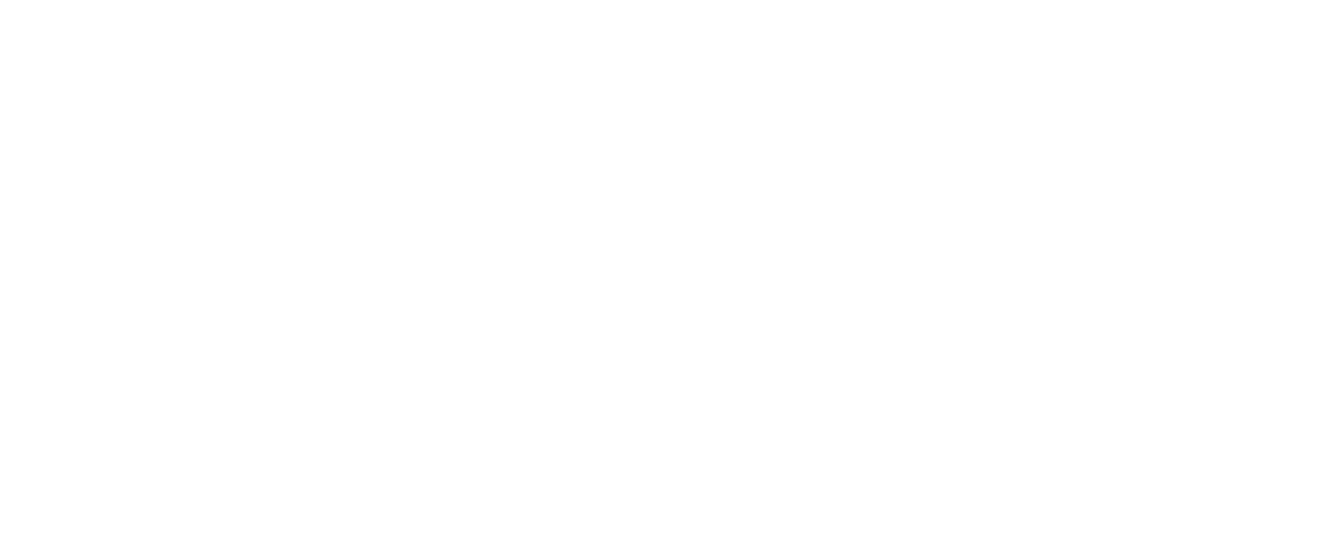

### 2.1 Midiendo la calidad de un candidato

> El problema es que podemos tener infinitos cortes $\theta$ por lo que tenemos que tener un método para definiir qué tan bueno es dentro de un conjunto de opciones y escoger el mejor.

La calidad de una división candidata del nodo $i$ se calcula utilizando una función de impureza o función de pérdida $H()$, cuya elección depende de la tarea que se resuelve (clasificación o regresión).

> Fíjense como $H$ la definen *sin* parámetros porque pueden variar dependiendo de H

$$
G\left(Q_i, \theta\right)=\frac{n_i^{\text {izq}}}{n_i} H\left(Q_i^{\text {izq}}(\theta)\right)+\frac{n_i^{\text {der}}}{n_i} H\left(Q_i^{\text {der}}(\theta)\right)
$$

Seleccionar el mejor $\theta$ que minimice la impureza.
$$
\theta^*=\operatorname{argmin}_\theta G\left(Q_i, \theta\right)
$$

> Fíjense como $Q_i$ permanece **estático** porque buscamos es el mejor $\theta$ para ese nodo $i$

De manera recursiva, ejecutamos ahora para los subconjuntos $Q_i^{\text{izq}}\left(\theta^*\right)$ y $Q_i^{\text{der}}\left(\theta^*\right)$ hasta el máximo permitido




## 2.2 Criterios de parada

Se alcanza la profundidad, $n_i<\min _{\text {samples }}$ o $n_i=1$.


### 2.3 Criterios para clasificación

Si el objetivo es hacer clasificación sobre las clases $$n_c \in \{0,1, \ldots, \mathrm{N}-1\}$$, para el nodo $i$, tenemos
$$
p_{i n_c}=\frac{1}{n_i} \sum_{y \in Q_i} I(y=n_c)
$$
la proporción de la clase $\mathrm{n_c}$ en el nodo $i$. Si $i$ es un nodo terminal, predict_proba para la región es $p_{i n_c}$. Criterios/métricas de calidad comunes son



Índice gini:
$$
H\left(Q_i\right)=\displaystyle \sum_{n_c} p_{i n_c}\left(1-p_{i n_c}\right)
$$

Log Loss or Entropy:
$$
H\left(Q_i\right)=-\sum_{n_c} p_{i n_c} \log \left(p_{i n_c}\right)
$$

[Canvas](https://excalidraw.com/)

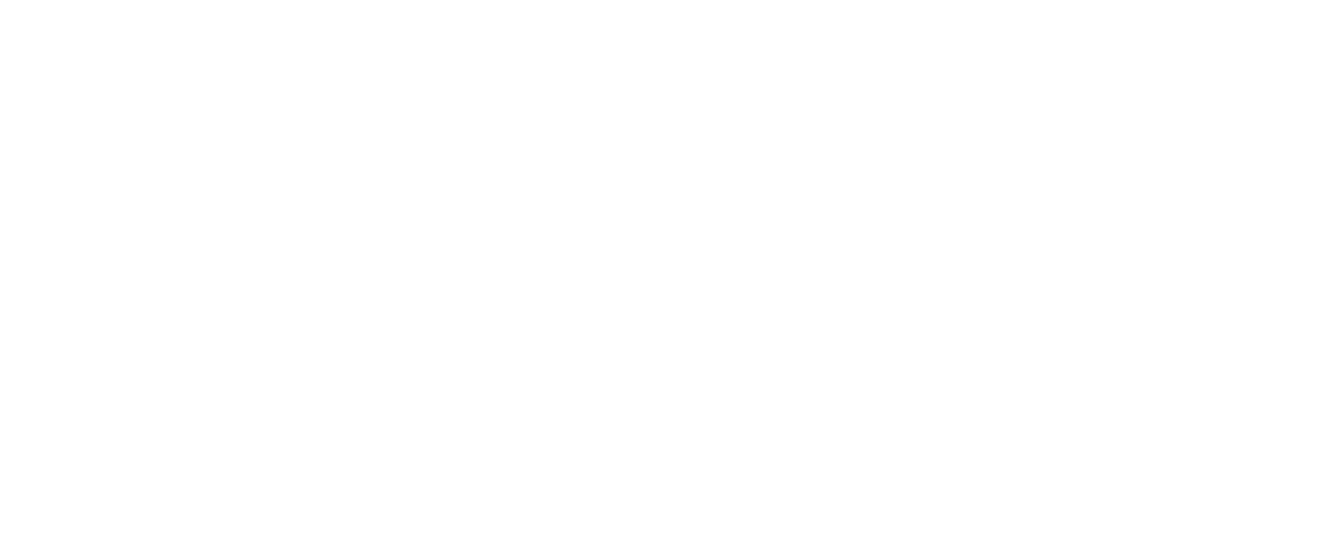

## 2.4 Limitaciones

### 2.4.1 Pros

1. Simples de entender y de interpretar. El modelo se puede visualizar!
1. Requiere poco preprocesamiento de datos y algunos algoritmos admiten valores faltantes.
1. El costo de predicción tiene complejidad logarítmica.
1. Generalizable a muchas clases.

### 2.4.2 Cons

1. Propenso a overfitting sobre todo la profundidad del árbol.
1. Los modelos pueden ser demasiado complejos y no generalizan bien.
1. Si expandimos el modelo con datos nuevos, el árbol puede modificarse radicalmente.
1. La mayoría de implementaciones son heurísticas porque el problema es NP-completo.

## 2.3 Código

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

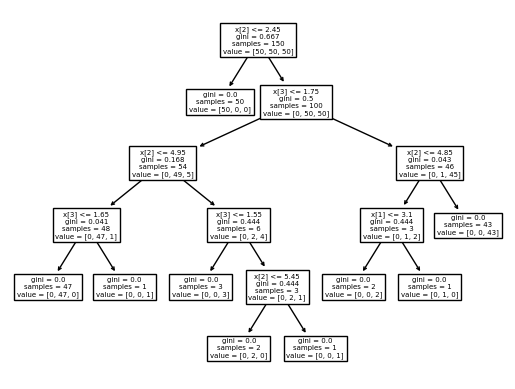

In [ ]:
tree.plot_tree(clf)

### 2.3.2 Otras opciones para graficar

In [ ]:
import plotly.express as px
df = px.data.iris()

fig = px.scatter_3d(
    df, x='sepal_length', y='sepal_width', z='petal_width',
    color='species',
    size = 'petal_length'
)

fig.show()

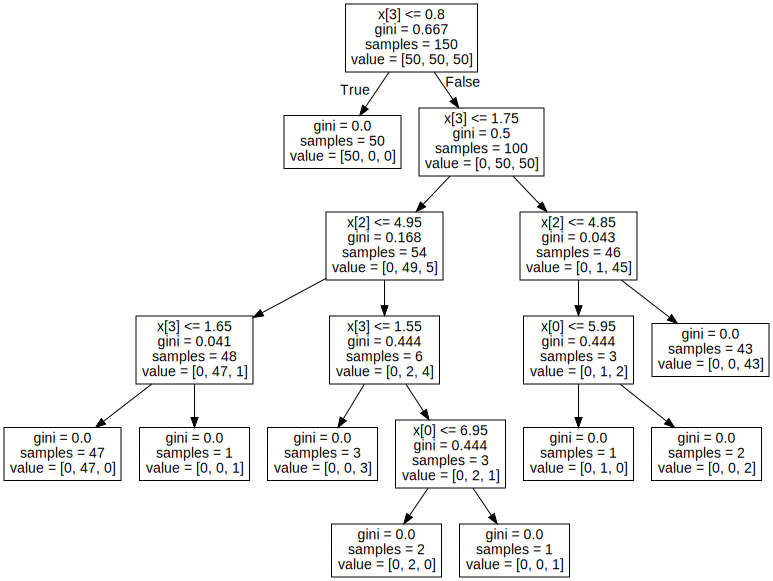

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

## 2.3.4 Intentemos nosotros

### Probabilidades

Si el objetivo es hacer clasificación sobre las clases $$n_c \in \{0,1, \ldots, \mathrm{N}-1\}$$, para el nodo $i$, tenemos
$$
p_{i n_c}=\frac{1}{n_i} \sum_{y \in Q_i} I(y=n_c)
$$

### Gini

$$
H\left(Q_i\right)=\displaystyle \sum_{n_c} p_{i n_c}\left(1-p_{i n_c}\right)
$$

In [ ]:
X, y = load_iris(return_X_y=True)


In [ ]:
p_i_nc = lambda y, nc: 1/len(y)* np.sum(y == nc)

In [ ]:
gini = lambda y, N: np.sum(np.sum(((p_i_nc(y, nc))*(1 - p_i_nc(y, nc)) for nc in N)))

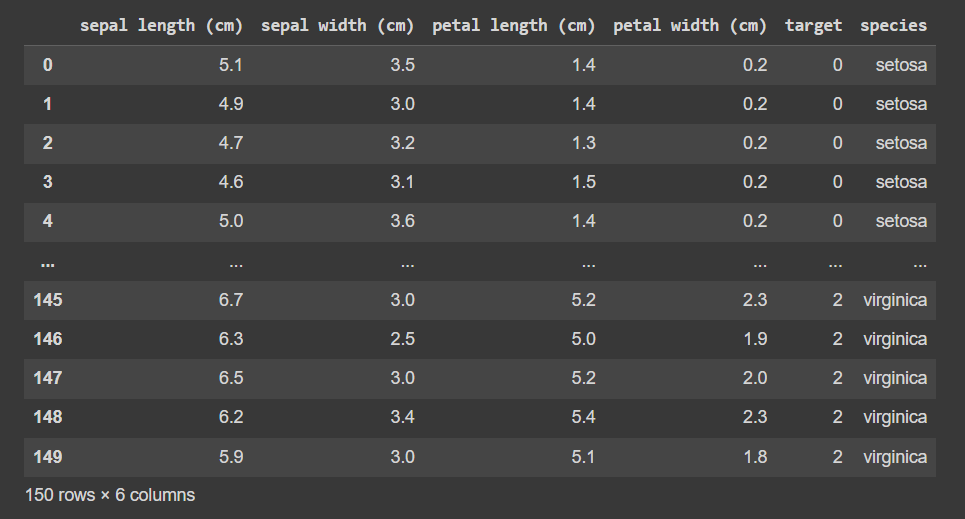

#### 2.3.4.a Primera iteración

$Q_i = \{1, \cdots, 150\}$ con $\theta=(3, 0.8)$ el indice gini es:

In [ ]:
gini(y, np.unique(y))

0.6666666666666667

#### 2.3.4.b Segunda iteración

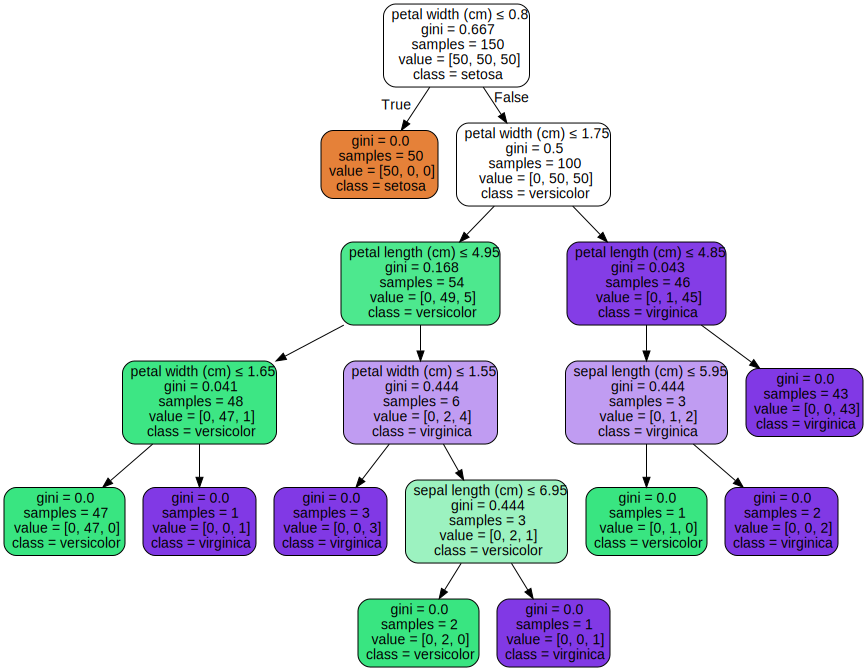

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                      feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
gini(y[X[:, 3] <= 0.8], np.unique(y[X[:, 3] <= 0.8]))

0.0

In [ ]:
gini(y[X[:, 3] > 0.8], np.unique(y[X[:, 3] > 0.8]))

0.5

#### 2.3.4.c Tercera iteración (izquierda)

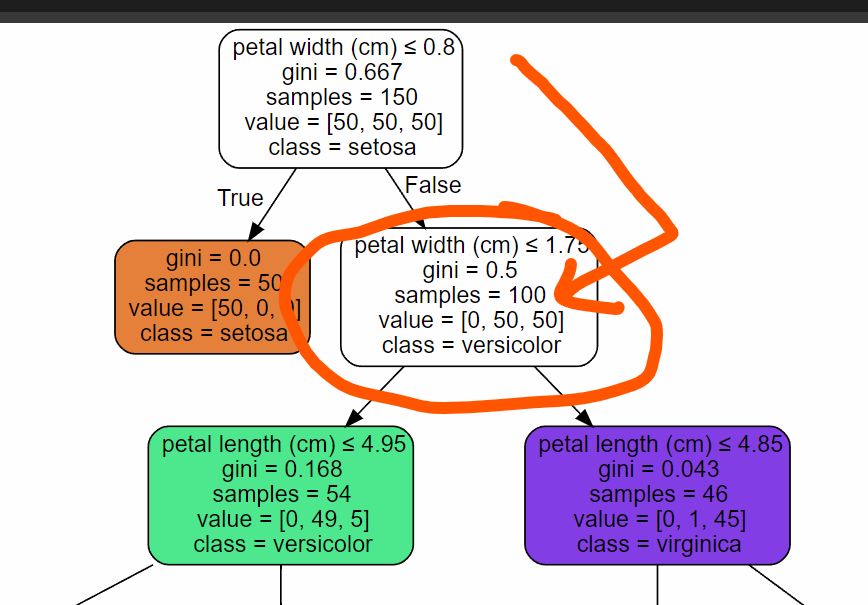

In [ ]:
gini(y[(X[:, 3] > 0.8)&(X[:, 3] <= 1.75)], np.unique(y[(X[:, 3] > 0.8)&(X[:, 3] <= 1.75)]))

0.04079861111111115

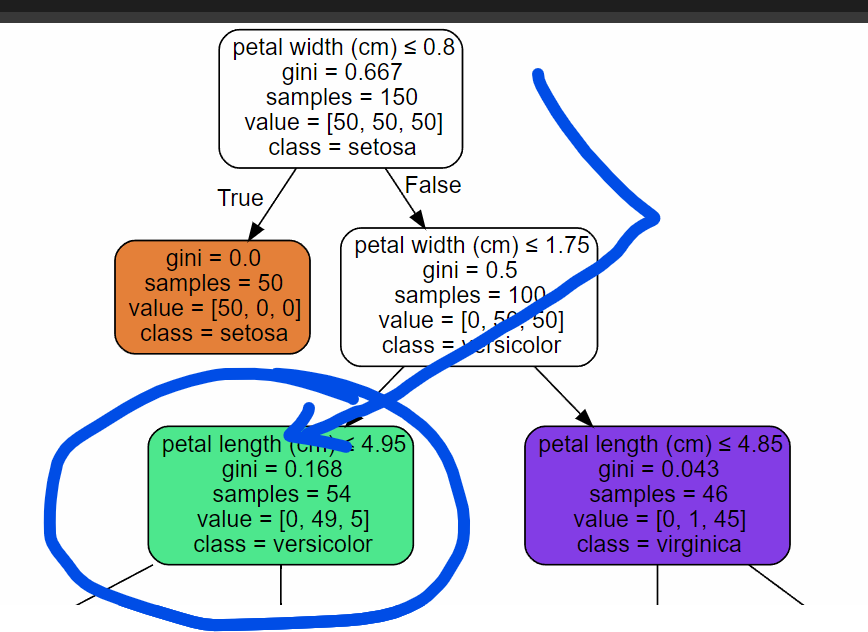

In [ ]:
gini(y[(X[:, 3] > 0.8)&(X[:, 3] <= 1.75)&(X[:, 2] <= 4.95)], np.unique(y[(X[:, 3] > 0.8)&(X[:, 3] <= 1.75)&(X[:, 2] <= 4.95)]))

## 2.5 Región de decisión

### 2.5.1 Código

Ejemplo tomado de [Plot Iris DTC](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html)

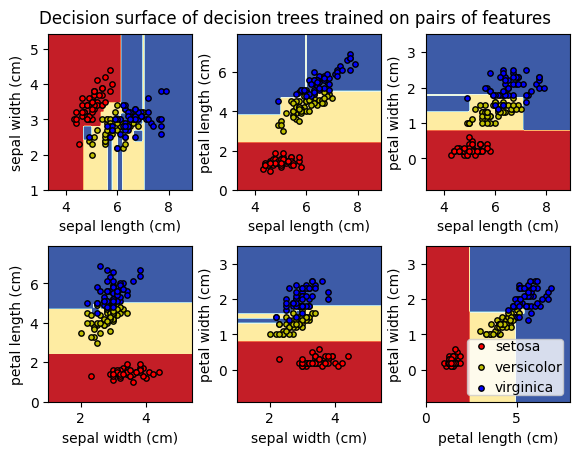

In [ ]:
 import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02




for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")